In [56]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap



In [57]:
df = pd.read_csv('swedish_population_by_year_and_sex_1860-2022.csv')
df

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,...,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0


In [58]:
df.describe()

,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,17386.162162,17623.864865,17826.581081,18070.504505,18291.918919,18508.846847,18721.824324,18891.126126,18892.121622,18828.959459,...,43445.333333,43907.004505,44373.950450,45023.211712,45586.675676,46081.914414,46520.671171,46753.581081,47082.549550,47394.396396
std,15645.403470,15839.298441,16001.893327,16206.160923,16420.421660,16585.922221,16784.191438,16916.504279,16795.995343,16636.004985,...,23925.183617,24100.434583,24284.013334,24590.958159,24838.714952,25029.843005,25155.082552,25190.251984,25235.572786,25302.509000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1151.500000,1227.750000,1236.750000,1277.500000,1258.500000,1255.750000,1249.500000,1181.250000,1368.250000,1271.750000,...,23423.750000,23503.500000,24530.250000,24218.000000,24466.000000,25000.500000,25636.500000,26880.500000,27366.000000,28946.250000
50%,13641.000000,14576.000000,14665.500000,14617.500000,14492.500000,14856.500000,15968.500000,16018.500000,17018.500000,17424.000000,...,55896.000000,56367.000000,56820.500000,57213.500000,57393.000000,57578.500000,57689.000000,57620.500000,57468.500000,57508.000000
75%,30140.000000,30429.000000,30371.000000,30739.000000,30680.250000,30936.000000,31234.750000,31301.500000,31130.500000,30608.000000,...,60710.750000,61194.500000,61421.500000,62341.750000,62943.250000,63559.000000,64155.250000,64231.250000,64387.500000,64586.000000
max,60589.000000,59797.000000,62371.000000,61515.000000,61931.000000,60998.000000,63036.000000,59071.000000,56706.000000,54322.000000,...,71269.000000,72659.000000,74108.000000,76198.000000,77718.000000,78928.000000,80028.000000,80578.000000,81453.000000,82506.000000


In [59]:
S = df['age']
S

0         0
1         0
2         1
3         1
4         2
       ... 
217     108
218     109
219     109
220    110+
221    110+
Name: age, Length: 222, dtype: object

In [60]:
df_pivot = pd.melt(df, id_vars=['age', 'sex'], var_name="year", value_name="ppl")

In [61]:
df_pivot

,age,sex,year,ppl
0,0,men,1860,60589
1,0,women,1860,58837
2,1,men,1860,56001
3,1,women,1860,54833
4,2,men,1860,52502
...,...,...,...,...
36181,108,women,2022,8
36182,109,men,2022,0
36183,109,women,2022,1
36184,110+,men,2022,0


In [62]:
df_pivot.groupby(['year','age']).sum()['ppl']

year  age
1860  0      119426
      1      110834
      10      78276
      100         0
      101         0
              ...  
2022  95       7263
      96       5413
      97       3811
      98       2733
      99       1769
Name: ppl, Length: 18093, dtype: int64

In [63]:
df_pivot["children"]= 0
df_pivot["elderly"] = 0
df_pivot["laborforce"] = 0

In [64]:
df_pivot


,age,sex,year,ppl,children,elderly,laborforce
0,0,men,1860,60589,0,0,0
1,0,women,1860,58837,0,0,0
2,1,men,1860,56001,0,0,0
3,1,women,1860,54833,0,0,0
4,2,men,1860,52502,0,0,0
...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0
36182,109,men,2022,0,0,0,0
36183,109,women,2022,1,0,0,0
36184,110+,men,2022,0,0,0,0


In [65]:
df_pivot['age'] = df_pivot['age'].replace('110+',110)

In [66]:
df_pivot

,age,sex,year,ppl,children,elderly,laborforce
0,0,men,1860,60589,0,0,0
1,0,women,1860,58837,0,0,0
2,1,men,1860,56001,0,0,0
3,1,women,1860,54833,0,0,0
4,2,men,1860,52502,0,0,0
...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0
36182,109,men,2022,0,0,0,0
36183,109,women,2022,1,0,0,0
36184,110,men,2022,0,0,0,0


In [67]:
df_pivot[['age','year']] = df_pivot[['age','year']].apply(pd.to_numeric)

In [68]:
df_pivot.loc[(df_pivot.age < 15), 'AgeGroup'] = 'children'

In [69]:
df_pivot.loc[((df_pivot.age > 14) & (df_pivot.age < 65)),  'AgeGroup'] = 'laborforce'

In [70]:
df_pivot.loc[(df_pivot.age > 64),  'AgeGroup'] = 'elderly'

In [71]:
df_pivot


,age,sex,year,ppl,children,elderly,laborforce,AgeGroup
0,0,men,1860,60589,0,0,0,children
1,0,women,1860,58837,0,0,0,children
2,1,men,1860,56001,0,0,0,children
3,1,women,1860,54833,0,0,0,children
4,2,men,1860,52502,0,0,0,children
...,...,...,...,...,...,...,...,...
36181,108,women,2022,8,0,0,0,elderly
36182,109,men,2022,0,0,0,0,elderly
36183,109,women,2022,1,0,0,0,elderly
36184,110,men,2022,0,0,0,0,elderly


In [72]:
df_new = df_pivot.groupby(['year','AgeGroup']).sum()['ppl'].reset_index()

In [73]:
df_new

,year,AgeGroup,ppl
0,1860,children,1292962
1,1860,elderly,201645
2,1860,laborforce,2365121
3,1861,children,1318714
4,1861,elderly,208106
...,...,...,...
484,2021,elderly,2118766
485,2021,laborforce,6494457
486,2022,children,1829093
487,2022,elderly,2147137


In [74]:
df_new.set_index('year', inplace=True)

In [75]:
df_new

,AgeGroup,ppl
year,,
1860,children,1292962
1860,elderly,201645
1860,laborforce,2365121
1861,children,1318714
1861,elderly,208106
...,...,...
2021,elderly,2118766
2021,laborforce,6494457
2022,children,1829093


In [76]:
df_new = df_new.pivot(columns = 'AgeGroup')

In [77]:
df_new.columns = df_new.columns.droplevel()
df_new.columns

Index(['children', 'elderly', 'laborforce'], dtype='object', name='AgeGroup')

In [78]:
df_new['dependencyRatio'] = df_new.apply(lambda x : 100*((x['children']+x['elderly'])/x['laborforce']),axis=1)

In [79]:
df_new

AgeGroup,children,elderly,laborforce,dependencyRatio
year,,,,
1860,1292962,201645,2365121,63.193680
1861,1318714,208106,2385678,63.999417
1862,1338720,212807,2405974,64.486441
1863,1362024,217661,2431967,64.955034
1864,1380235,219574,2460997,65.006540
...,...,...,...,...
2018,1819729,2035711,6374745,60.479909
2019,1834821,2065367,6427401,60.680639
2020,1837798,2088086,6453411,60.834247


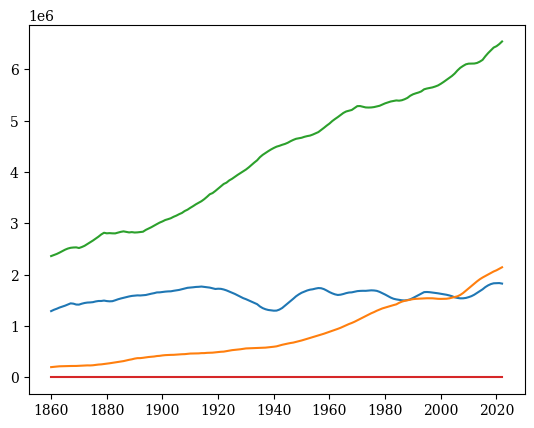

In [80]:
plt.plot(df_new)

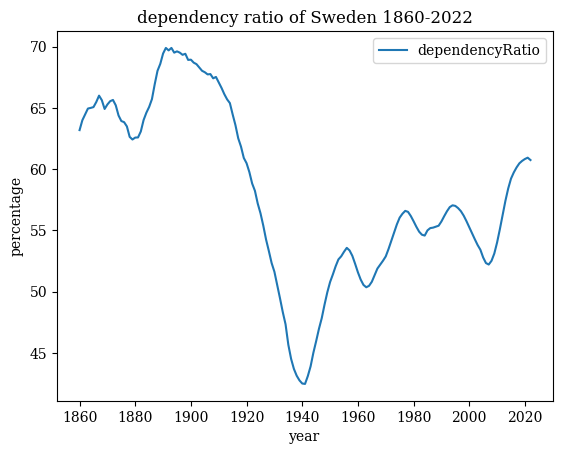

In [81]:
plt.rcParams.update({'text.usetex':False, 'font.family' : 'serif'})
df_new['dependencyRatio'].plot()

plt.title('dependency ratio of Sweden 1860-2022')
plt.xlabel('year')  
plt.ylabel('percentage')


plt.legend()
plt.savefig('dependency_ratio_plot.pdf')
plt.show()

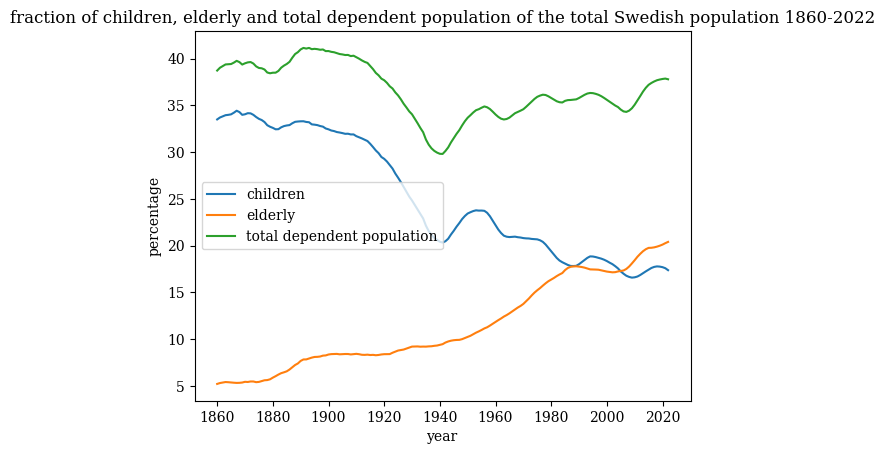

In [82]:
df_new.apply(lambda x : 100*((x['children'])/(x['children']+x['elderly']+x['laborforce'])),axis=1).plot(label = "children")
df_new.apply(lambda x : 100*((x['elderly'])/(x['children']+x['elderly']+x['laborforce'])),axis=1).plot(label = "elderly")
df_new.apply(lambda x : 100*((x['children']+x['elderly'])/(x['children']+x['elderly']+x['laborforce'])),axis=1).plot(label = "total dependent population")


plt.title('fraction of children, elderly and total dependent population of the total Swedish population 1860-2022')
plt.xlabel('year')  
plt.ylabel('percentage')




plt.legend()
plt.savefig('fraction_of_ppl_plot.pdf',bbox_inches = 'tight')

plt.show()